<a href="https://colab.research.google.com/github/BrahmleenKaur/BrahmleenKaur.github.io/blob/master/PRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages 

In [ ]:
import numpy as np 
import pandas as pd 

import re
import nltk
from autocorrect import Speller

In [ ]:
!pip install autocorrect

     |████████████████████████████████| 624kB 13.4MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.4.0-cp37-none-any.whl size=621775 sha256=0eab56a0fe7d65018a76d1618d45356e5371a4db483a30c05a91ce7131a73952
  Stored in directory: /root/.cache/pip/wheels/1d/b0/d4/b941891ad0f8d8847be03583e21e68ed4732d763c71a6c0943
Successfully built autocorrect


In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Saving smile-annotations-final.csv to smile-annotations-final.csv


# Importing Dataset

In [ ]:


#Importing Dataset
dataset =pd.read_csv('smile-annotations-final.csv', header=None ,encoding='ISO-8859-1',names=['id', 'text', 'category'])

# Printing the dataset shape 
print ("Dataset Length: ", len(dataset)) 
print ("Dataset Shape: ", dataset.shape) 

# Printing the dataset obseravtions 
print (dataset.head()) 

Dataset Length:  3085
Dataset Shape:  (3085, 3)
                   id  ... category
0  611857364396965889  ...   nocode
1  614484565059596288  ...    happy
2  614746522043973632  ...    happy
3  614877582664835073  ...    happy
4  611932373039644672  ...    happy

[5 rows x 3 columns]


In [ ]:
dataset.category.value_counts()

nocode               1572
happy                1137
not-relevant          214
angry                  57
surprise               35
sad                    32
happy|surprise         11
happy|sad               9
disgust|angry           7
disgust                 6
sad|angry               2
sad|disgust             2
sad|disgust|angry       1
Name: category, dtype: int64

In [ ]:
dataset = dataset[dataset.category.isin(['happy', 'not-relevant', 'angry', 'surprise', 'sad', 'disgust'])]

In [ ]:
dataset.category.value_counts()

happy           1137
not-relevant     214
angry             57
surprise          35
sad               32
disgust            6
Name: category, dtype: int64

In [ ]:
possible_labels = dataset.category.unique()

In [ ]:
label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index

In [ ]:
label_dict

{'angry': 2,
 'disgust': 3,
 'happy': 0,
 'not-relevant': 1,
 'sad': 4,
 'surprise': 5}

In [ ]:
dataset["Label"] = dataset["category"].replace(label_dict)
dataset.head(10)

,id,text,category,Label
1,614484565059596288,Dorian Gray with Rainbow Scarf #LoveWins (from...,happy,0
2,614746522043973632,@SelectShowcase @Tate_StIves ... Replace with ...,happy,0
3,614877582664835073,@Sofabsports thank you for following me back. ...,happy,0
4,611932373039644672,@britishmuseum @TudorHistory What a beautiful ...,happy,0
5,611570404268883969,@NationalGallery @ThePoldarkian I have always ...,happy,0
9,614499696015503361,Lucky @FitzMuseum_UK! Good luck @MirandaStearn...,happy,0
12,613601881441570816,Yr 9 art students are off to the @britishmuseu...,happy,0
15,613696526297210880,@RAMMuseum Please vote for us as @sainsbury #s...,not-relevant,1
16,610746718641102848,#AskTheGallery Have you got plans to privatise...,not-relevant,1
18,612648200588038144,@BarbyWT @britishmuseum so beautiful,happy,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


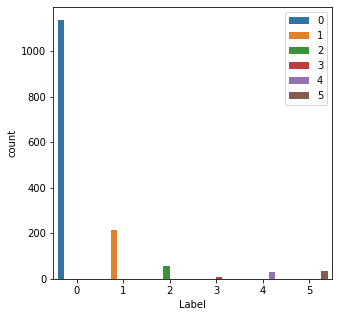

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (5,5)
sns.countplot(dataset["Label"],hue = dataset["Label"])
plt.legend(loc = 'upper right')
plt.show()

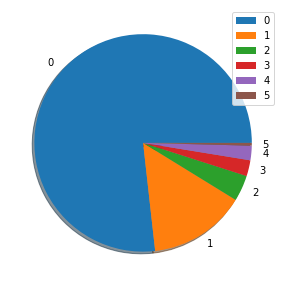

In [ ]:
labels = [0,1,2,3,4,5]
sizes = dataset["Label"].value_counts()
plt.pie(sizes,labels = labels,shadow = True)
plt.legend()
plt.show()

In [ ]:
dataset.category = dataset['category'].map(label_dict)

In [ ]:
dataset.head(10)

,id,text,category,Label
1,614484565059596288,Dorian Gray with Rainbow Scarf #LoveWins (from...,0,0
2,614746522043973632,@SelectShowcase @Tate_StIves ... Replace with ...,0,0
3,614877582664835073,@Sofabsports thank you for following me back. ...,0,0
4,611932373039644672,@britishmuseum @TudorHistory What a beautiful ...,0,0
5,611570404268883969,@NationalGallery @ThePoldarkian I have always ...,0,0
9,614499696015503361,Lucky @FitzMuseum_UK! Good luck @MirandaStearn...,0,0
12,613601881441570816,Yr 9 art students are off to the @britishmuseu...,0,0
15,613696526297210880,@RAMMuseum Please vote for us as @sainsbury #s...,1,1
16,610746718641102848,#AskTheGallery Have you got plans to privatise...,1,1
18,612648200588038144,@BarbyWT @britishmuseum so beautiful,0,0


# Preprocessing the data

In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize as wt 

nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

#spell correction
from autocorrect import Speller
spell = Speller(lang='en')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data = []

for i in range(dataset.shape[0]):
    text = dataset.iloc[i, 1]
    #remove URls
    text = re.sub(r"http\$+|https\$+"," ",text,flags = re.MULTILINE)
    # remove non alphabatic characters
    text = re.sub('[^A-Za-z]', ' ', str(text))
    # make words lowercase, because Go and go will be considered as two words
    text = text.lower()
    # tokenising
    tokenized_text = wt(text)
    # remove stop words and stemming
 
    text_processed = []
    for word in tokenized_text:
        if word not in set(stopwords.words('english')):
            text_processed.append(spell(stemmer.stem(word)))

    text_text = " ".join(text_processed)
    data.append(text_text)

In [ ]:
# creating the feature matrix 
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(max_features=500)
X= matrix.fit_transform(data).toarray()
y = dataset.iloc[:, 2]

In [ ]:
# split train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
report = []

# Information Gain

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

acc_list = []
maxDepth_list = []
for i in range(1, 100,5):
    dt = DecisionTreeClassifier( criterion = "entropy", random_state = 150,max_depth = i)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc=accuracy_score(y_test,y_pred)*100
    acc_list.append(acc)
    maxDepth_list.append(i)

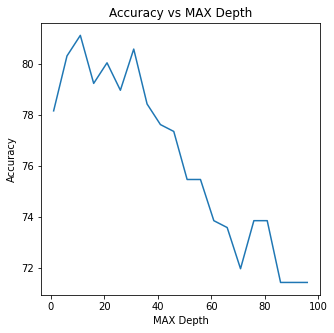

In [ ]:
plt.plot(maxDepth_list,acc_list)
plt.xlabel("MAX Depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs MAX Depth")
plt.show()

In [ ]:
best_MaxDepth=0
max_acc=0
length= len(maxDepth_list)
for i in range(length):
    if(max_acc< acc_list[i]):
        max_acc = acc_list[i]
        best_MaxDepth=maxDepth_list[i]

In [ ]:
print(best_MaxDepth)
print(max_acc)

11
81.13207547169812


In [ ]:
dt = DecisionTreeClassifier( criterion = "entropy", random_state = 150,max_depth = best_MaxDepth)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred)) 

print("\n\nAccuracy:")
print (accuracy_score(y_test,y_pred)*100) 

print("\n\nReport:")
print(classification_report(y_test, y_pred))
report.append(classification_report(y_test, y_pred,output_dict = True))

Confusion matrix:
[[278   0   2   0   0   0]
 [ 41  14   5   0   0   0]
 [  6   0   9   0   0   0]
 [  3   0   0   0   0   0]
 [  5   0   0   0   0   0]
 [  8   0   0   0   0   0]]


Accuracy:
81.13207547169812


Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       280
           1       1.00      0.23      0.38        60
           2       0.56      0.60      0.58        15
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         8

    accuracy                           0.81       371
   macro avg       0.40      0.30      0.31       371
weighted avg       0.80      0.81      0.76       371



c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [ ]:
from matplotlib import pyplot
# get importance
importance = dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00633
Feature: 21, Score: 0.10982
Feature: 22, Score: 0.01041
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00585
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

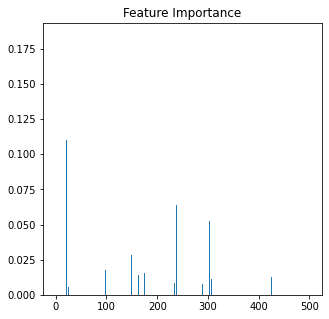

In [ ]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title("Feature Importance")
pyplot.show()

[Text(220.85867275280899, 260.475, 'X[158] <= 0.5\nentropy = 1.146\nsamples = 1110\nvalue = [857, 154, 42, 3, 27, 27]'),
 Text(214.58900983146066, 237.82500000000002, 'X[21] <= 0.5\nentropy = 1.101\nsamples = 1083\nvalue = [857, 127, 42, 3, 27, 27]'),
 Text(178.39150280898875, 215.175, 'X[332] <= 0.5\nentropy = 1.044\nsamples = 1059\nvalue = [852, 122, 29, 3, 26, 27]'),
 Text(153.01896067415728, 192.525, 'X[238] <= 0.5\nentropy = 1.009\nsamples = 1049\nvalue = [851, 121, 21, 3, 26, 27]'),
 Text(146.74929775280899, 169.875, 'X[303] <= 0.5\nentropy = 1.073\nsamples = 961\nvalue = [763, 121, 21, 3, 26, 27]'),
 Text(114.813202247191, 147.225, 'X[66] <= 0.5\nentropy = 1.045\nsamples = 954\nvalue = [762, 120, 17, 2, 26, 27]'),
 Text(82.28932584269663, 124.57499999999999, 'X[123] <= 0.5\nentropy = 1.137\nsamples = 480\nvalue = [376, 53, 8, 1, 17, 25]'),
 Text(57.99438202247191, 101.92499999999998, 'X[149] <= 0.5\nentropy = 1.194\nsamples = 436\nvalue = [334, 53, 8, 1, 15, 25]'),
 Text(40.7528

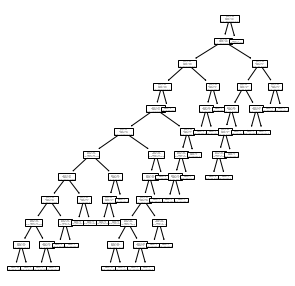

In [ ]:
from sklearn import tree
tree.plot_tree(dt)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.353099730458221
Mean Squared Error: 1.0377358490566038
Root Mean Squared Error: 1.0186932065428747


# Gini 

In [ ]:
acc_list = []
maxDepth_list = []
for i in range(1, 100,5):
    dt = DecisionTreeClassifier( criterion = "gini", random_state = 150,max_depth = i)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc=accuracy_score(y_test,y_pred)*100
    acc_list.append(acc)
    maxDepth_list.append(i)

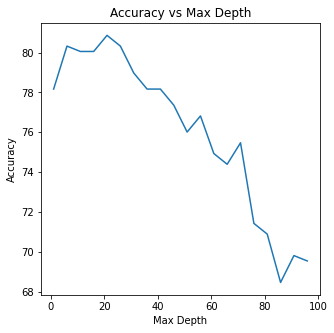

In [ ]:
plt.plot(maxDepth_list,acc_list)
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Max Depth")
plt.show()

In [ ]:
best_MaxDepth=0
max_acc=0
length= len(maxDepth_list)
for i in range(length):
    if(max_acc< acc_list[i]):
        max_acc = acc_list[i]
        best_MaxDepth=maxDepth_list[i]

In [ ]:
print(best_MaxDepth)
print(max_acc)

21
80.86253369272237


In [ ]:
dg = DecisionTreeClassifier( criterion = "gini", random_state = 150, max_depth = best_MaxDepth)
dg.fit(X_train, y_train)
y_pred = dg.predict(X_test)
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred)) 

print("\n\nAccuracy:")
print (accuracy_score(y_test,y_pred)*100) 

print("\n\nReport:")
print(classification_report(y_test, y_pred))
report.append(classification_report(y_test, y_pred,output_dict = True))

Confusion matrix:
[[272   4   1   0   3   0]
 [ 36  19   5   0   0   0]
 [  6   0   9   0   0   0]
 [  3   0   0   0   0   0]
 [  5   0   0   0   0   0]
 [  7   0   0   0   1   0]]


Accuracy:
80.86253369272237


Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       280
           1       0.83      0.32      0.46        60
           2       0.60      0.60      0.60        15
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         8

    accuracy                           0.81       371
   macro avg       0.38      0.31      0.33       371
weighted avg       0.78      0.81      0.77       371



c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [ ]:
# get importance
importance = dg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.05995
Feature: 22, Score: 0.00991
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.01186
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

Feature: 478, Score: 0.00000
Feature: 479, Score: 0.00000
Feature: 480, Score: 0.00000
Feature: 481, Score: 0.00000
Feature: 482, Score: 0.00000
Feature: 483, Score: 0.00000
Feature: 484, Score: 0.00000
Feature: 485, Score: 0.00000
Feature: 486, Score: 0.00000
Feature: 487, Score: 0.00631
Feature: 488, Score: 0.00000
Feature: 489, Score: 0.00000
Feature: 490, Score: 0.00000
Feature: 491, Score: 0.02043
Feature: 492, Score: 0.00000
Feature: 493, Score: 0.00000
Feature: 494, Score: 0.00000
Feature: 495, Score: 0.00000
Feature: 496, Score: 0.00000
Feature: 497, Score: 0.00983
Feature: 498, Score: 0.00000
Feature: 499, Score: 0.00144


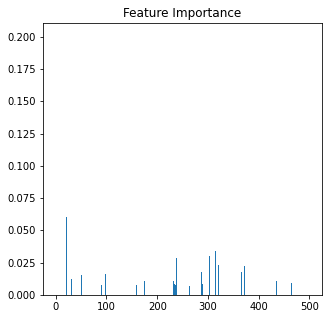

In [ ]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title("Feature Importance")
pyplot.show()

[Text(249.19996223564954, 265.6227272727273, 'X[158] <= 0.5\ngini = 0.382\nsamples = 1110\nvalue = [857, 154, 42, 3, 27, 27]'),
 Text(244.70449395770393, 253.26818181818183, 'X[332] <= 0.5\ngini = 0.357\nsamples = 1083\nvalue = [857, 127, 42, 3, 27, 27]'),
 Text(219.3999244712991, 240.91363636363639, 'X[21] <= 0.5\ngini = 0.343\nsamples = 1069\nvalue = [856, 126, 31, 3, 26, 27]'),
 Text(195.76359516616313, 228.5590909090909, 'X[91] <= 0.5\ngini = 0.327\nsamples = 1049\nvalue = [851, 121, 21, 3, 26, 27]'),
 Text(191.26812688821752, 216.20454545454547, 'X[315] <= 0.5\ngini = 0.322\nsamples = 1044\nvalue = [851, 116, 21, 3, 26, 27]'),
 Text(170.96827794561932, 203.85000000000002, 'X[303] <= 0.5\ngini = 0.313\nsamples = 1029\nvalue = [845, 107, 21, 3, 26, 27]'),
 Text(152.84592145015105, 191.49545454545455, 'X[113] <= 0.5\ngini = 0.306\nsamples = 1022\nvalue = [844, 106, 17, 2, 26, 27]'),
 Text(139.0785498489426, 179.14090909090908, 'X[422] <= 0.5\ngini = 0.301\nsamples = 1017\nvalue = [84

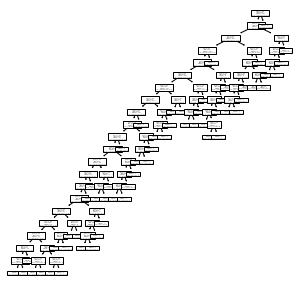

In [ ]:
tree.plot_tree(dg)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3665768194070081
Mean Squared Error: 1.0889487870619947
Root Mean Squared Error: 1.0435270897595303


# Naive Bayes

In [ ]:
# Naive Bayes 
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# predict class
y_pred = classifier.predict(X_test)

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred)) 

print("\n\nAccuracy:")
print (accuracy_score(y_test,y_pred)*100) 

print("\n\nReport:")
print(classification_report(y_test, y_pred))
report.append(classification_report(y_test, y_pred,output_dict = True))

Confusion matrix:
[[238  18   6   6  11   1]
 [ 25  24   2   7   1   1]
 [  6   2   6   0   1   0]
 [  1   0   1   0   0   1]
 [  2   1   1   0   1   0]
 [  2   4   0   2   0   0]]


Accuracy:
72.50673854447439


Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       280
           1       0.49      0.40      0.44        60
           2       0.38      0.40      0.39        15
           3       0.00      0.00      0.00         3
           4       0.07      0.20      0.11         5
           5       0.00      0.00      0.00         8

    accuracy                           0.73       371
   macro avg       0.30      0.31      0.30       371
weighted avg       0.75      0.73      0.74       371



In [ ]:
from sklearn.inspection import permutation_importance
# perform permutation importance
results = permutation_importance(classifier, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00122
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00365
Feature: 3, Score: 0.00230
Feature: 4, Score: 0.00000
Feature: 5, Score: -0.00027
Feature: 6, Score: 0.00081
Feature: 7, Score: 0.00635
Feature: 8, Score: 0.00122
Feature: 9, Score: 0.00149
Feature: 10, Score: 0.00054
Feature: 11, Score: 0.00014
Feature: 12, Score: 0.00054
Feature: 13, Score: 0.00027
Feature: 14, Score: 0.00081
Feature: 15, Score: 0.00014
Feature: 16, Score: -0.00014
Feature: 17, Score: 0.00054
Feature: 18, Score: 0.00041
Feature: 19, Score: 0.00014
Feature: 20, Score: 0.00041
Feature: 21, Score: 0.00041
Feature: 22, Score: -0.00041
Feature: 23, Score: 0.00068
Feature: 24, Score: 0.00027
Feature: 25, Score: 0.00081
Feature: 26, Score: 0.00216
Feature: 27, Score: 0.00014
Feature: 28, Score: 0.00095
Feature: 29, Score: 0.00122
Feature: 30, Score: 0.00135
Feature: 31, Score: 0.00986
Feature: 32, Score: 0.00351
Feature: 33, Score: 0.00405
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00284

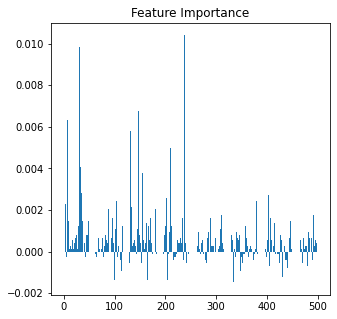

In [ ]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title("Feature Importance")
pyplot.show()

In [ ]:
# get importance
importance = classifier.class_prior_
# summarize feature importance
for i,v in enumerate(importance):
    print('Class: %0d, Score: %.5f' % (i,v))

Class: 0, Score: 0.77207
Class: 1, Score: 0.13874
Class: 2, Score: 0.03784
Class: 3, Score: 0.00270
Class: 4, Score: 0.02432
Class: 5, Score: 0.02432


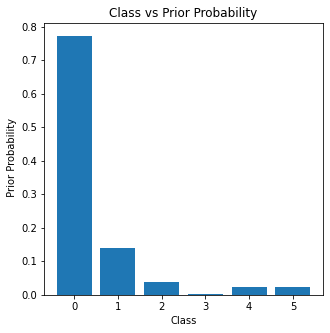

In [ ]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title("Class vs Prior Probability")
pyplot.xlabel("Class")
pyplot.ylabel(" Prior Probability")
pyplot.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5660377358490566
Mean Squared Error: 1.5849056603773586
Root Mean Squared Error: 1.2589303635933795


In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred=nb.predict(X_test)

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred)) 

print("\n\nAccuracy:")
print (accuracy_score(y_test,y_pred)*100) 

print("\n\nReport:")
print(classification_report(y_test, y_pred))
report.append(classification_report(y_test, y_pred,output_dict = True))

Confusion matrix:
[[272   2   1   0   1   4]
 [ 32  19   5   0   2   2]
 [  5   0  10   0   0   0]
 [  2   0   1   0   0   0]
 [  5   0   0   0   0   0]
 [  7   1   0   0   0   0]]


Accuracy:
81.13207547169812


Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       280
           1       0.86      0.32      0.46        60
           2       0.59      0.67      0.62        15
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         8

    accuracy                           0.81       371
   macro avg       0.38      0.33      0.33       371
weighted avg       0.80      0.81      0.78       371



c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [ ]:
# perform permutation importance
results = permutation_importance(nb, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00014
Feature: 2, Score: 0.00419
Feature: 3, Score: -0.00014
Feature: 4, Score: 0.00000
Feature: 5, Score: -0.00014
Feature: 6, Score: -0.00068
Feature: 7, Score: 0.00014
Feature: 8, Score: -0.00135
Feature: 9, Score: -0.00041
Feature: 10, Score: 0.00014
Feature: 11, Score: -0.00014
Feature: 12, Score: 0.00000
Feature: 13, Score: -0.00027
Feature: 14, Score: -0.00054
Feature: 15, Score: -0.00054
Feature: 16, Score: -0.00081
Feature: 17, Score: 0.00041
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: -0.00014
Feature: 21, Score: 0.00122
Feature: 22, Score: 0.00014
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00014
Feature: 25, Score: 0.00068
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00014
Feature: 29, Score: 0.00054
Feature: 30, Score: 0.00014
Feature: 31, Score: 0.00068
Feature: 32, Score: 0.00419
Feature: 33, Score: 0.00000
Feature: 34, Score: -0.00054
Feature: 35, Score

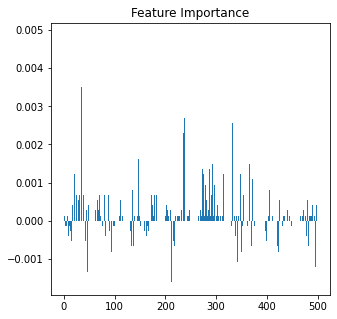

In [ ]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title("Feature Importance")
pyplot.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.41778975741239893
Mean Squared Error: 1.398921832884097
Root Mean Squared Error: 1.18276026010519


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
acc_list = []
k_list = []
for i in range(1, 250,5):
    knn = KNeighborsClassifier(n_neighbors=i)
    # Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc=accuracy_score(y_test,y_pred)*100
    acc_list.append(acc)
    k_list.append(i)

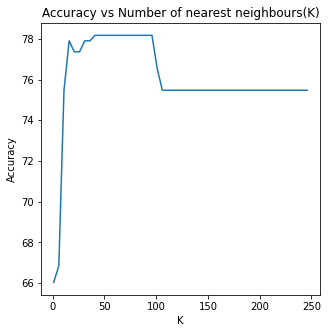

In [ ]:
plt.plot(k_list,acc_list)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of nearest neighbours(K)")
plt.show()

In [ ]:
best_k=0
max_acc=0
length= len(k_list)
for i in range(length):
    if(max_acc< acc_list[i]):
        max_acc = acc_list[i]
        best_k=k_list[i]

In [ ]:
print(best_k)
print(max_acc)

41
78.16711590296495


In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_k)
# Fit the model on the training data.
knn.fit(X_train, y_train)

# performing predictions on the test dataset 
Y_pred = knn.predict(X_test) 

print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 371 points : 91


In [ ]:
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred)) 

print("\n\nAccuracy:")
print (accuracy_score(y_test,y_pred)*100) 

print("\n\nReport:")
print(classification_report(y_test, y_pred))
report.append(classification_report(y_test, y_pred,output_dict = True))

Confusion matrix:
[[280   0   0   0   0   0]
 [ 60   0   0   0   0   0]
 [ 15   0   0   0   0   0]
 [  3   0   0   0   0   0]
 [  5   0   0   0   0   0]
 [  8   0   0   0   0   0]]


Accuracy:
75.47169811320755


Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       280
           1       0.00      0.00      0.00        60
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         8

    accuracy                           0.75       371
   macro avg       0.13      0.17      0.14       371
weighted avg       0.57      0.75      0.65       371



c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [ ]:
# perform permutation importance
results = permutation_importance(knn, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: -0.00014
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00068
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00068
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00068
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00014
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00014
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
F

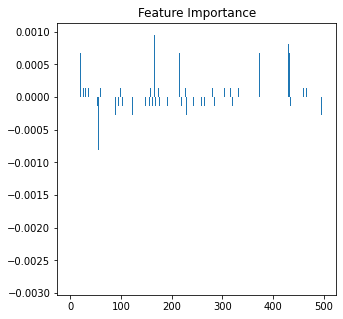

In [ ]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title("Feature Importance")
pyplot.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.42857142857142855
Mean Squared Error: 1.150943396226415
Root Mean Squared Error: 1.0728203000626038


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
acc_list = []
r_list = []
for i in range(1, 200,1):
    rfc=RandomForestClassifier(n_estimators = i)   
    # Fit the model on the training data.
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    acc=accuracy_score(y_test,y_pred)*100
    acc_list.append(acc)
    r_list.append(i)

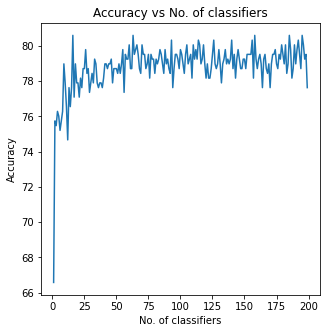

In [ ]:
plt.plot(r_list,acc_list)
plt.xlabel("No. of classifiers")
plt.ylabel("Accuracy")
plt.title("Accuracy vs No. of classifiers")
plt.show()

In [ ]:
best_NoOfClassifiers=0
max_acc=0
length= len(r_list)
for i in range(length):
    if(max_acc< acc_list[i]):
        max_acc = acc_list[i]
        best_NoOfClassifiers=r_list[i]

In [ ]:
print(best_NoOfClassifiers)
print(max_acc)

16
80.59299191374663


In [ ]:
# creating a RF classifier 
RF_clf = RandomForestClassifier(n_estimators = best_NoOfClassifiers) 

# Training the model on the training dataset 
# fit function is used to train the model using the training sets as parameters 
RF_clf.fit(X_train, y_train) 

# performing predictions on the test dataset 
Y_pred = RF_clf.predict(X_test) 

print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 371 points : 83


In [ ]:
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred)) 

print("\n\nAccuracy:")
print (accuracy_score(y_test,y_pred)*100) 

print("\n\nReport:")
print(classification_report(y_test, y_pred))
report.append(classification_report(y_test, y_pred,output_dict = True))

Confusion matrix:
[[254  24   1   0   1   0]
 [ 31  25   4   0   0   0]
 [  5   1   9   0   0   0]
 [  1   2   0   0   0   0]
 [  4   1   0   0   0   0]
 [  4   4   0   0   0   0]]


Accuracy:
77.62803234501348


Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       280
           1       0.44      0.42      0.43        60
           2       0.64      0.60      0.62        15
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         8

    accuracy                           0.78       371
   macro avg       0.32      0.32      0.32       371
weighted avg       0.74      0.78      0.76       371



c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [ ]:
# get importance
importance = RF_clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00142
Feature: 1, Score: 0.00120
Feature: 2, Score: 0.00453
Feature: 3, Score: 0.00066
Feature: 4, Score: 0.00034
Feature: 5, Score: 0.00258
Feature: 6, Score: 0.00281
Feature: 7, Score: 0.00223
Feature: 8, Score: 0.00647
Feature: 9, Score: 0.00173
Feature: 10, Score: 0.00222
Feature: 11, Score: 0.00228
Feature: 12, Score: 0.00236
Feature: 13, Score: 0.00251
Feature: 14, Score: 0.00212
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00261
Feature: 17, Score: 0.00747
Feature: 18, Score: 0.00038
Feature: 19, Score: 0.00028
Feature: 20, Score: 0.00350
Feature: 21, Score: 0.02379
Feature: 22, Score: 0.00047
Feature: 23, Score: 0.00026
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00141
Feature: 26, Score: 0.00057
Feature: 27, Score: 0.00301
Feature: 28, Score: 0.00122
Feature: 29, Score: 0.00247
Feature: 30, Score: 0.00067
Feature: 31, Score: 0.00701
Feature: 32, Score: 0.01047
Feature: 33, Score: 0.00113
Feature: 34, Score: 0.00219
Feature: 35, Score: 0.00570
Fe

Feature: 304, Score: 0.00162
Feature: 305, Score: 0.00231
Feature: 306, Score: 0.00005
Feature: 307, Score: 0.00056
Feature: 308, Score: 0.00176
Feature: 309, Score: 0.00000
Feature: 310, Score: 0.00246
Feature: 311, Score: 0.00044
Feature: 312, Score: 0.00077
Feature: 313, Score: 0.00288
Feature: 314, Score: 0.00322
Feature: 315, Score: 0.00768
Feature: 316, Score: 0.00043
Feature: 317, Score: 0.00040
Feature: 318, Score: 0.00015
Feature: 319, Score: 0.00292
Feature: 320, Score: 0.00082
Feature: 321, Score: 0.00444
Feature: 322, Score: 0.00087
Feature: 323, Score: 0.00077
Feature: 324, Score: 0.00000
Feature: 325, Score: 0.00408
Feature: 326, Score: 0.00021
Feature: 327, Score: 0.00000
Feature: 328, Score: 0.00073
Feature: 329, Score: 0.00102
Feature: 330, Score: 0.00374
Feature: 331, Score: 0.00015
Feature: 332, Score: 0.01481
Feature: 333, Score: 0.00002
Feature: 334, Score: 0.00031
Feature: 335, Score: 0.00026
Feature: 336, Score: 0.00210
Feature: 337, Score: 0.00146
Feature: 338, 

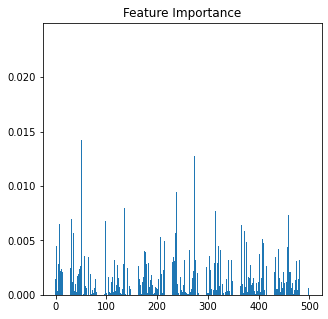

In [ ]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title("Feature Importance")
pyplot.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3719676549865229
Mean Squared Error: 0.954177897574124
Root Mean Squared Error: 0.9768202995301254


# Gradient boost

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier

acc_list = []
lr_list = []
for i in np.arange(0.05, 1,0.02):
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=i, max_features=2, max_depth=2, random_state=0)
    # Fit the model on the training data.
    gb_clf.fit(X_train, y_train)
    y_pred = gb_clf.predict(X_test)
    acc=accuracy_score(y_test,y_pred)*100
    acc_list.append(acc)
    lr_list.append(i)

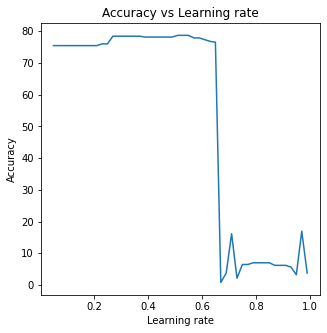

In [ ]:
plt.plot(lr_list,acc_list)
plt.xlabel("Learning rate")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Learning rate")
plt.show()

In [ ]:
best_lr=0
max_acc=0
length= len(lr_list)
for i in range(length):
    if(max_acc< acc_list[i]):
        max_acc = acc_list[i]
        best_lr=lr_list[i]

In [ ]:
print(best_lr)
print(max_acc)

0.5100000000000001
78.70619946091644


In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=best_lr, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train)

print("Learning rate: ", best_lr)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
print("Accuracy score (testing): {0:.3f}".format(gb_clf.score(X_test, y_test)))

print("\n\nAccuracy:")
print (accuracy_score(y_test,y_pred)*100) 

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred)) 

print("\n\nReport:")
print(classification_report(y_test, y_pred))
report.append(classification_report(y_test, y_pred,output_dict = True))

Learning rate:  0.5100000000000001
Accuracy score (training): 0.806
Accuracy score (testing): 0.787


Accuracy:
3.7735849056603774
Confusion matrix:
[[  3   4   0   0 273   0]
 [  0   6   0   0  54   0]
 [  0   1   0   0  14   0]
 [  0   0   0   0   3   0]
 [  0   0   0   0   5   0]
 [  0   0   0   0   8   0]]


Report:
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       280
           1       0.55      0.10      0.17        60
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00         3
           4       0.01      1.00      0.03         5
           5       0.00      0.00      0.00         8

    accuracy                           0.04       371
   macro avg       0.26      0.19      0.04       371
weighted avg       0.84      0.04      0.04       371



c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [ ]:
# get importance
importance = gb_clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00180
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00060
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00014
Feature: 9, Score: 0.01236
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00331
Feature: 12, Score: 0.00008
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00137
Feature: 15, Score: 0.00088
Feature: 16, Score: 0.01083
Feature: 17, Score: 0.00251
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00139
Feature: 22, Score: 0.00007
Feature: 23, Score: 0.00002
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00010
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.17556
Feature: 33, Score: 0.00257
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

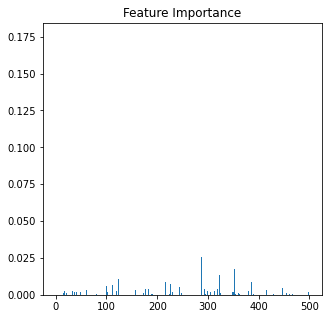

In [ ]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title("Feature Importance")
pyplot.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5741239892183289
Mean Squared Error: 1.9380053908355794
Root Mean Squared Error: 1.392122620617731


In [ ]:
classifiers = ['Information Gain','Gini','Naive Bayes','KNN','Random Forest','Gradient Boost']

In [ ]:
weighted_f1Score = []
accuracy =[]
weighted_precision = []
weighted_recall=[]

for i in range(0,6):
    weighted_f1Score.append(report[i]['weighted avg']['f1-score'])
    accuracy.append (report[i]['accuracy'])
    weighted_precision.append (report[i]['weighted avg']['precision'])
    weighted_recall.append (report[i]['weighted avg']['recall'])

In [ ]:
d = [accuracy, weighted_precision,weighted_recall,weighted_f1Score]

In [ ]:
df = pd.DataFrame(d , columns = classifiers ,index = ["Accuracy","weighted_precision","weighted_recall","weighted_f1Score"])
df
f = np.transpose(df)
f

,Accuracy,weighted_precision,weighted_recall,weighted_f1Score
Information Gain,0.811321,0.799750,0.811321,0.760390
Gini,0.808625,0.781818,0.808625,0.772466
Naive Bayes,0.725067,0.750894,0.725067,0.736745
KNN,0.811321,0.799006,0.811321,0.781088
Random Forest,0.754717,0.569598,0.754717,0.649219
Gradient Boost,0.776280,0.738054,0.776280,0.756378


<AxesSubplot:title={'center':'Comparison of Different Classifiers'}>

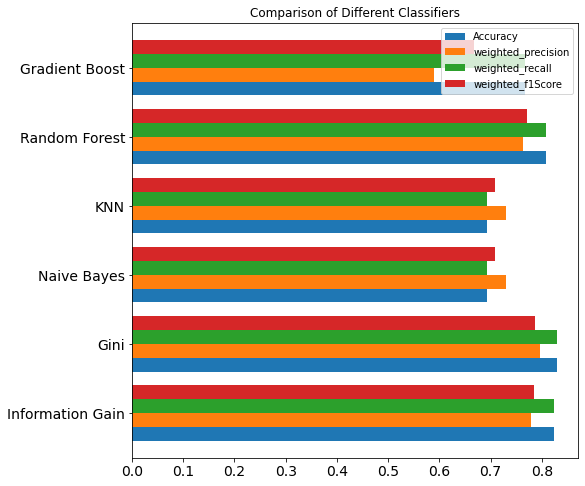

In [ ]:
f.plot.barh(stacked = False, title ='Comparison of Different Classifiers' ,fontsize = 14 ,figsize = (8,8) ,width=0.8 )
